# Introduction to Simple Linear Regression

### Introduction

#### Regression
Regression is a statistical model which allows to predict an output from infinitely many possible outputs based upon the relationship between the dependent and independent variables. For example, the prediction of house prices based on different parameters such as location, size , house age etc.It is a classification of supervised learning(i.e, learns from data labelled with 'right' answers).

#### Linear Regression
Linear Regression is a statistical method that aims to find the relationship to describe the correlation between a dependent variable(also known as output / target variable) and one or more independent variables(input variable/features). The relationship is modeled as a linear equation ,which allows to predict the values of the dependent variable based upon the values of the independent variables.

Linear regression is of primarily of 2 kinds:
- Simple Linear Regression
- Multiple Linear Regression

in this notebook, we are only interested in the former one.


### Mathematical Formulation
##### General Formula
Simple linear regression is the simplest form of linear regression, because it involves one independent variable and one depedent variable. The general equation of simple linear regression is :
$$ y = wx + b $$
where:<br>
<mark>y</mark> is the dependent variable or target variable <br>
<mark>x</mark> is the independent variable, often referred to as features <br>
<mark>w</mark> , <mark>b</mark> = parameters/ co-efficients/ weights ; different values of w and b produces different lines<br>
<br>

<b><mark>
The goal is to find the optimum values for w and b ; to plot the line which best represents the scattered data in order to predict the y-value upon entering the x-value as accurately as possible.  
</mark></b>

<b>We will take some arbitrary values to plot a random graph to further explain the intricacies of linear regression, for which we would require some python libraries (Numpy and Matplotlib) for plotting and depicting the scenerios.</b> 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#random values
#a pair (x,y) is a single training example
#(x[i], y[i]) = ith training example
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
n = x.size

In [4]:
#plot function
def plot(w,b):
    plt.scatter(x,y,color="red")
    plt.plot(x,w*x+b,color="blue")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Scatter Plot with Regression Line")
    plt.grid(True)
    plt.show()

Suppose <b> w = 0.5 </b> and <b> b = 2.3 </b>, we will plot the graph based upon this values.

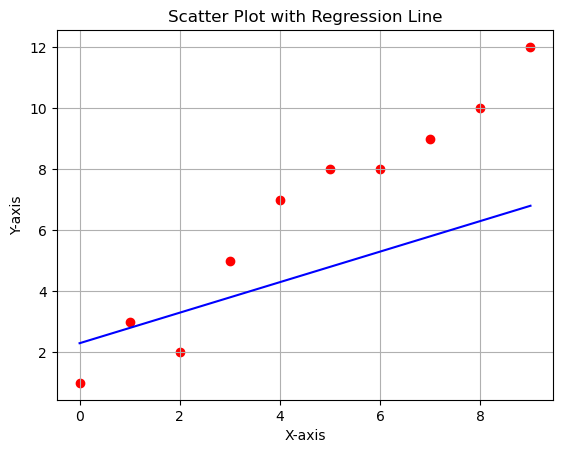

In [5]:
plot( w = 0.5, b = 2.3)

The plotted line is not best-suited to represent the scattered data. Surely we can find better values of w and b to produce a more suitable result.We will introduce the concept of <mark>cost function</mark> to calculate how much the plotted line daviated from the optimum result. The values of w and b that produces the least amount of cost is the optimum solution.

#### Cost Function
The cost function calculates the difference between the predicted value $ \hat{y} $ (called: "y-hat") and the true value y.The less the cost, the fitter the line is. We will use a particular form of cost function known as the <b>Square Error Cost Function</b>. The form is given below:<br>
$$
J(w,b) = \frac {1}{2n}\sum \limits_{i=1} ^{n} (\hat{y} - y) ^{2}
$$

In [6]:
def square_error_cost(w,b):
    sum = 0
    n = len(x)
    for i in range(0,n):
        y_hat_i = w * x[i] + b
        sum += (y_hat_i - y[i])**2
        
    return sum/(2*n)

Now let us calculate the value of error cost J for the values of w = 0.5 and b = 2.3


In [7]:
J_w_b = square_error_cost( w = 0.5 , b = 2.3)
print(f"J(w,b) = {J_w_b}")

J(w,b) = 4.032500000000001


<b> Can we do better than that?? </b> <br>
Let us use some other value for w and b

In [8]:
J_w_b = square_error_cost( w = 0.9 , b = 1.0)
print(f"J(w,b) = {J_w_b}")

J(w,b) = 1.6325000000000003


Error has been reduced for the new w and b ; let us plot the line into the graph

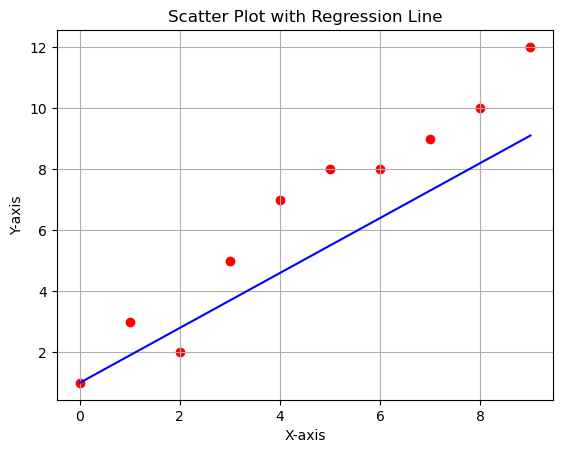

In [9]:
plot(w = 0.9, b = 1.0)

This plot-line is definitely better than the previous one. So we check for different values of w and b to find which value produces the least amount of cost. However, that is a lenghty process, might take eons for large dataset. We are going to use another formula to find out the solution in a more efficient manner. 

#### Gradient Descent
Gradient descent is a way to find the optimum values for w and b . The idea is to start with random values of w and b and gradually fall towards the optimum solution. If we were to see the error-cost vs weights graph, then it would have been a 3D
'bowl' shaped structure.So, we could use the knowledge of differentiation to find the minima.
###### Algorithm
<br>
<center>
<b>
repeat until convergence {
<br>
$$
    w = w - \alpha \frac {\delta} {\delta w} J(w,b)
$$
<br>
$$
    b = b - \alpha \frac {\delta} {\delta b} J(w,b)
$$
<br>
}
</b>
   
</center>        

Here $\alpha$ is called learning rate, which controls rate of jumping towards the solution.
 $$
     \frac {\delta} {\delta w} J(w,b) = \frac {\delta} {\delta w} \frac {1}{2n}\sum \limits_{i=1} ^{n} (\hat{y} - y) ^{2}
 $$
 <br>
 $$
     \frac {\delta} {\delta w} J(w,b) = \frac {\delta} {\delta w} \frac {1}{2n}\sum \limits_{i=1} ^{n} (wx + b - y) ^{2}
 $$
 <br>
 $$
     \frac {\delta} {\delta w} J(w,b) = \frac {1}{2n} 2x \sum \limits_{i=1} ^{n} (wx + b - y)
 $$  
 <br>
 $$
     \frac {\delta} {\delta w} J(w,b) = \frac {1}{n} \sum \limits_{i=1} ^{n} (wx + b - y) x
 $$  


Similarly,


 $$
     \frac {\delta} {\delta b} J(w,b) = \frac {\delta} {\delta b} \frac {1}{2n}\sum \limits_{i=1} ^{n} (\hat{y} - y) ^{2}
 $$
 <br>
 $$
     \frac {\delta} {\delta b} J(w,b) = \frac {\delta} {\delta b} \frac {1}{2n}\sum \limits_{i=1} ^{n} (wx + b - y) ^{2}
 $$
 <br>
 $$
     \frac {\delta} {\delta b} J(w,b) = \frac {1}{2n} 2 \sum \limits_{i=1} ^{n} (wx + b - y)
 $$  
 <br>
 $$
     \frac {\delta} {\delta b} J(w,b) = \frac {1}{n} \sum \limits_{i=1} ^{n} (wx + b - y) 
 $$  

<br>
<br>
So the updated algorithm is : 
<br>
<center>
<b>
repeat until convergence {
<br>
    $$
         w = w - \alpha \frac {1}{n} \sum \limits_{i=1} ^{n} (wx + b - y) x
    $$  
<br>
    $$
        b = b - \alpha \frac {1}{n} \sum \limits_{i=1} ^{n} (wx + b - y) 
    $$  
<br>
}
</b>

In [10]:
def gradient_descent(x,y,w,b,trials, a) : 
    n = len(x)
    
    while trials>0 :
        sum_b = 0
        sum_w = 0
        for i in range(0,n):
            sum_b += (w*x[i] + b - y[i])
            sum_w += (w*x[i] + b - y[i]) * x[i]
        
        w = w - (a/n) * sum_w
        b = b - (a/n) * sum_b
        trials -= 1
    
    return w,b

In [17]:
w,b = gradient_descent(x,y,w = 3, b = 3, trials = 10000 , a = 0.0005)
print(w)
print(b)

1.1139231371779044
1.586098241001377


In [18]:
J_w_b = square_error_cost(w,b)
print(f"J(w,b) : {J_w_b} ")

J(w,b) : 0.29891985697191126 


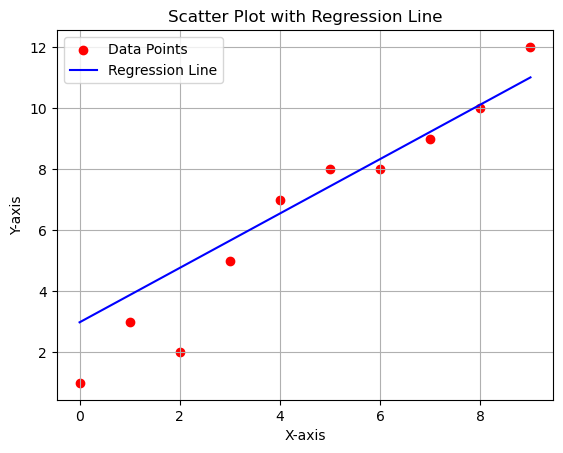

In [13]:
plt.scatter(x, y, color="red", label="Data Points")
plt.plot(x, w * x + b, color="blue", label="Regression Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

As it can be seen, the result seems pretty satisfactory. The plotted line may not be the exact solution...but it is pretty close to it to be suitable for our applications. 

## Conclution
Linear regression is a fairly straightforward way to establish the corelation between the dependent and indepedent variables. The time complexity is costly though, requiring $\theta$(TN) (T=number of trials,N=size of the dataset) operations to calculate the optimum solution.